In [2]:
import numpy as np 
import pandas as pd 
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn import (metrics, linear_model, preprocessing)
from sklearn.model_selection import train_test_split 
import xgboost as xgb 
from matplotlib import pyplot
# feature selection    make sure to update xgboost package
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, KFold, RepeatedKFold, GridSearchCV
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, auc
from bayes_opt import BayesianOptimization
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV, KFold
from scipy.stats import uniform,randint
from xgboost import plot_importance

In [3]:
# Function importing Dataset 
def read_data(path): 
    df = pd.read_csv(path, na_values='NA')
    # Printing the dataswet shape 
    print ("features:") 
    print (list(df.columns)) 
    print ("row and column number") 
    print (df.shape) 
    print ("data / feature types:") 
    print (df.dtypes) 
    df_num = df.select_dtypes(include='number')
    df_cat = df.select_dtypes(include='object')
    print ("missing values:") 
    print (df.isnull().sum()) 
    return [df, df_num, df_cat] 


In [4]:
path = './../data/sales_buy.csv'
dflist = read_data(path)

df = dflist[0]
predictor = list(df.columns)

for s in ['customerid', 'buy']:
    predictor.remove(s)
    
print (predictor)

X = df[predictor]
y = df.buy

X_train, X_test, y_train, y_test = train_test_split( 
        X, y, test_size = 0.2, random_state = 7) 


# model = xgb.XGBClassifier() 
model = xgb.XGBRegressor() 
model.fit(X_train, y_train) 

#y_pred = model.predict_proba(X_test)[:,1]
y_pred = model.predict(X_test) 


fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)  
roc_auc = metrics.auc(fpr, tpr)  
print ("auc is", roc_auc)


features:
['customerid', 'amt_1m', 'amt_2m', 'amt_3m', 'cnt_1m', 'cnt_3m', 'cnt_1m.1', 'amt_com_1m', 'amt_com_2m', 'amt_com_3m', 'distance', 'buy']
row and column number
(71260, 12)
data / feature types:
customerid      int64
amt_1m        float64
amt_2m        float64
amt_3m        float64
cnt_1m          int64
cnt_3m          int64
cnt_1m.1        int64
amt_com_1m    float64
amt_com_2m    float64
amt_com_3m    float64
distance      float64
buy             int64
dtype: object
missing values:
customerid    0
amt_1m        0
amt_2m        0
amt_3m        0
cnt_1m        0
cnt_3m        0
cnt_1m.1      0
amt_com_1m    0
amt_com_2m    0
amt_com_3m    0
distance      0
buy           0
dtype: int64
['amt_1m', 'amt_2m', 'amt_3m', 'cnt_1m', 'cnt_3m', 'cnt_1m.1', 'amt_com_1m', 'amt_com_2m', 'amt_com_3m', 'distance']
auc is 0.8919704682136051


['amt_com_1m', 0.35650712]
['amt_2m', 0.16217706]
['amt_com_2m', 0.10077248]
['amt_com_3m', 0.08331442]
['distance', 0.057795506]
['cnt_1m.1', 0.05570384]
['amt_3m', 0.053058248]
['cnt_3m', 0.05053492]
['cnt_1m', 0.04380872]
['amt_1m', 0.03632779]


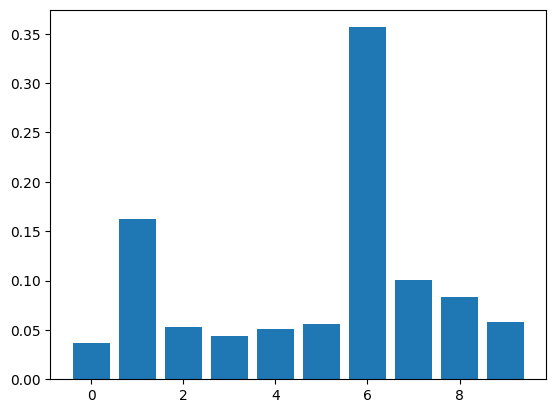

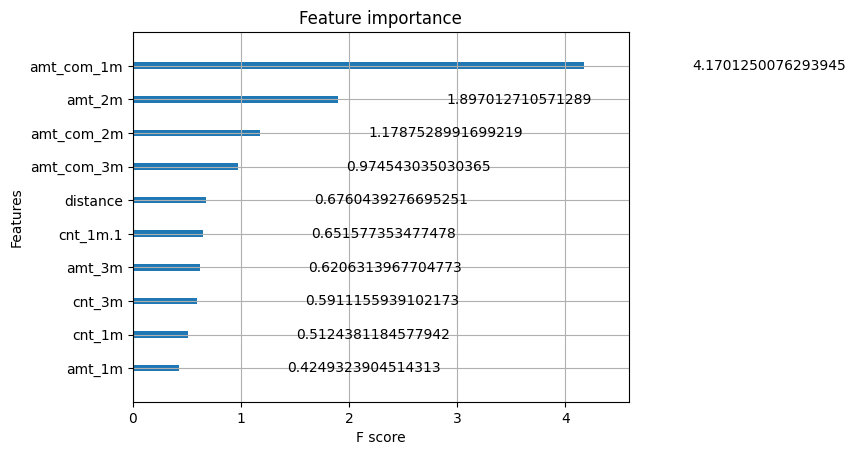

In [5]:
#  we can list importance by dict, by 'gain'
sorted_idx = np.argsort(model.feature_importances_)[::-1]
for index in sorted_idx:
    print([X_train.columns[index], model.feature_importances_[index]]) 

important_var = [(X_train.columns[index], model.feature_importances_[index]) for index in sorted_idx]

imp = model.feature_importances_
pyplot.bar(range(len(model.feature_importances_)), model.feature_importances_)
pyplot.show()

# or use embeded tool to plot feature importance
plot_importance(model, importance_type='gain')
pyplot.show()

<AxesSubplot: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

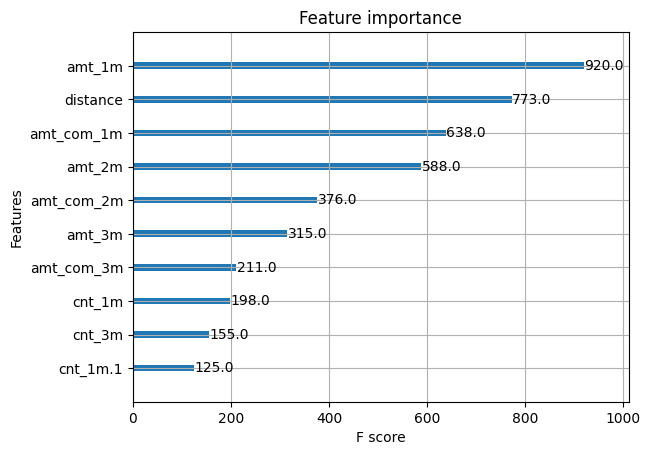

In [6]:
 plot_importance(model, importance_type='weight') # default option is 'weight'

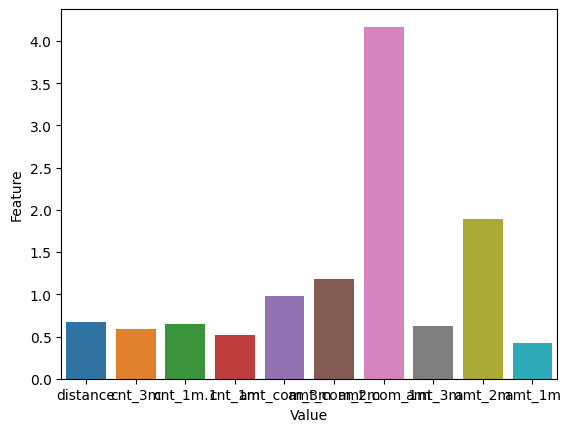

In [8]:
 # using get_score() method of native booster
imp_gain = model.get_booster().get_score(importance_type="gain")
imp_weight = model.get_booster().get_score(importance_type="weight")

# other way seaborn for importance levels
import seaborn as sns
important_values = list(imp_gain.values())
important_vars = list(imp_gain.keys())
sorted_idx = np.argsort(important_values)[::-1]
important_var_gain = [(important_vars[index], important_values[index]) for index in sorted_idx]


feature_imp = pd.DataFrame(important_var_gain, columns=['Value','Feature'])
pic=sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
pic.figure.savefig('importance.png')

# grid search for parameters tuning
param_search = {
'max_depth':range(4, 8),
'min_child_weight': (1,3,5),
'learning_rate': (0.01, 0.03, 0.05),
'subsample': (0.7, 0.8, 0.9, 1.0)
}

In [10]:
search = GridSearchCV(estimator = xgb.XGBClassifier(n_estimators=300,
gamma=0, colsample_bytree=0.8, objective= 'binary:logistic', nthread=4, seed=2, tree_method='gpu_hist'), 
param_grid = param_search, scoring='roc_auc', n_jobs=4, cv=3)

search.fit(X_train, y_train)

search.best_params_, search.best_score

AttributeError: 'GridSearchCV' object has no attribute 'best_score'

: 

In [ ]:
print(search.best_params_, search.best_score)